# **SDGym - Synthetic Data Gym Metrics Evaluation**

In [ ]:
import os
import sys
import platform
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pdb

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

OS = platform.system()   # Operating System 

#**Data Download**

In [ ]:
os.system('git clone https://github.com/istat-methodology/Synthetic_Data.git')

0

#**All Installations: SDGym, Matplotlib, Table Evaluatoretc**

In [ ]:
os.system('pip install sdgym')
os.system('pip install matplotlib==3.1.3')

0

In [ ]:
sdgym.__version__

NameError: ignored

#**All Sythetic Data Gym Imports**

In [ ]:
from sdv.evaluation import evaluate
from sdv.metrics.tabular import CSTest, KSTest                                      # Statistical Metrics
from sdv.metrics.tabular import BNLikelihood, BNLogLikelihood, GMLogLikelihood      # Likelihood Metrics¶
from sdv.metrics.tabular import LogisticDetection, SVCDetection                     # Detection Metrics
from sdv.metrics.tabular import MulticlassDecisionTreeClassifier                    # Machine Learning Efficacy Metrics¶
from sdv.metrics.tabular import NumericalLR 

ImportError: ignored

#**Visualization Options Settings**

In [ ]:
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500) 

#**All Initializations**

In [ ]:
orig_data_path = './Synthetic_Data/Datasets/syntetic_telephony.xlsx'
synth_data_path = './Synthetic_Data/Output/Telephony Synt Results/telephony_synth_data_generated_by_method_copulagantotal_time_2863.58_score_0.45.xlsx'
display_matches = False

#**All General Functions Definitions**

In [ ]:
def explore_data(data): 
  print("\nHead of Data: \n", data.head())
  print("\nTail of Data: \n", data.tail())
  print("\nShape of Data: ", data.shape)
  print("\nInformation about Data: \n")
  try: 
    data.info()
  except: 
    pass
  print("\nTypes of Data attributes: \n")
  try: 
    data.dtypes
  except: 
    pass
  print("\nSummary of all numerical fields in the dataset: \n")
  try: 
    data.describe(include = [np.number])
  except: 
    pass
  print("\nSummary of all categorical fields in the dataset: \n")
  try: 
    data.describe(include = ['O'])
  except: 
    pass
  print("\nLoop Through Each Column and Check for nulls: \n")
  try: 
    for i in range(len(data.columns)):
        print(data.columns[i] + ": " + str(data[data.columns[i]].isna().sum()))
  except: 
    pass

def data_download(file_to_download, gdrive_code, OS, uncompress = True):
  if not os.path.exists(file_to_download):
    os.system('gdown --id "'+gdrive_code+'" --output '+file_to_download)
    if OS == "Linux" and uncompress:
        os.system('unzip -o -n "./'+file_to_download+'" -d "./"')
    return True
  else: 
    return None

#**Original Data Reading**

In [ ]:
xl_file = pd.ExcelFile(orig_data_path)
dfs = {sheet_name: xl_file.parse(sheet_name) for sheet_name in xl_file.sheet_names}
orig_data = dfs['Sheet1']

#**Original Data Preprocessing**

In [ ]:
# Renaming Columns into English
orig_data.rename(columns = {'COD_CELLA_CHIAMATA':'CELL_CALL_CODE', 
                      'DATA_CHIAMATA':'CALL_DATE',
                      'CHIAVE_NUM_CHIAMANTE':'NUM_CALLER_KEY',
                      'ORA_MIN_CHIAMATA':'TIME_MIN_CALL'}, inplace = True)

# Casting Datatypes  
orig_data.CELL_CALL_CODE=orig_data.CELL_CALL_CODE.astype("int64").astype("str")

orig_data.CALL_DATE=pd.to_datetime(orig_data.CALL_DATE, format='%Y%m%d')
orig_data.NUM_CALLER_KEY=orig_data.NUM_CALLER_KEY.astype("int64").astype("str")

orig_data.TIME_MIN_CALL=orig_data.TIME_MIN_CALL.astype("str").str.pad(width=6, side='left', fillchar='0')
orig_data.TIME_MIN_CALL =pd.to_datetime(orig_data.TIME_MIN_CALL , format='%H%M%S').dt.time.astype("str")
orig_data.TIME_MIN_CALL =pd.to_datetime(orig_data.TIME_MIN_CALL)

explore_data(orig_data)

NameError: ignored

#**Original Data Exports**

In [ ]:
orig_data.to_excel('./'+os.path.basename(orig_data_path).rsplit('.', 1)[0]+'_export.xlsx')
orig_data.to_csv('./'+os.path.basename(orig_data_path).rsplit('.', 1)[0]+'_export.csv')

#**Synthetic Data Reading**

In [ ]:
xl_file = pd.ExcelFile(synth_data_path)
dfs = {sheet_name: xl_file.parse(sheet_name) for sheet_name in xl_file.sheet_names}
synth_data = dfs['Sheet1']

#**Synthetic Data Preprocessing**

In [ ]:
# Renaming Columns into English
synth_data.rename(columns = {'COD_CELLA_CHIAMATA':'CELL_CALL_CODE', 
                      'DATA_CHIAMATA':'CALL_DATE',
                      'CHIAVE_NUM_CHIAMANTE':'NUM_CALLER_KEY',
                      'ORA_MIN_CHIAMATA':'TIME_MIN_CALL'}, inplace = True)

# Removing F character from Dataframe
synth_data["CELL_CALL_CODE"] = synth_data["CELL_CALL_CODE"].str.replace("F","")
synth_data["NUM_CALLER_KEY"] = synth_data["NUM_CALLER_KEY"].str.replace("F","")

# Casting Datatypes  
synth_data.CELL_CALL_CODE=synth_data.CELL_CALL_CODE.astype("int64").astype("str")

synth_data.CALL_DATE=pd.to_datetime(synth_data.CALL_DATE, format='%Y%m%d')
synth_data.NUM_CALLER_KEY=synth_data.NUM_CALLER_KEY.astype("int64").astype("str")

synth_data.TIME_MIN_CALL=synth_data.TIME_MIN_CALL.astype("str").str.pad(width=6, side='left', fillchar='0')
synth_data.TIME_MIN_CALL =pd.to_datetime(synth_data.TIME_MIN_CALL).dt.time.astype("str")
synth_data.TIME_MIN_CALL =pd.to_datetime(synth_data.TIME_MIN_CALL)

synth_data.drop("Unnamed: 0", axis=1, inplace=True)

explore_data(synth_data)


Head of Data: 
       NUM_CALLER_KEY  CALL_DATE       TIME_MIN_CALL CELL_CALL_CODE
0  14615366112382500 2017-01-30 2022-11-29 15:54:19            258
1  14615362915496210 2017-01-14 2022-11-29 11:54:30            781
2  14615430050428180 2017-01-20 2022-11-29 21:25:36             18
3  14615339806425970 2017-01-09 2022-11-29 17:36:41            311
4  14615390824437770 2017-01-06 2022-11-29 13:20:43            565

Tail of Data: 
          NUM_CALLER_KEY  CALL_DATE       TIME_MIN_CALL CELL_CALL_CODE
9995  14615362915496210 2017-01-04 2022-11-29 12:00:18            107
9996  14615224339316630 2017-01-05 2022-11-29 08:12:24            231
9997  14615228723636630 2017-01-02 2022-11-29 16:51:31              9
9998  14615362915496210 2017-01-25 2022-11-29 21:06:11            644
9999  14615420085225040 2017-02-06 2022-11-29 15:19:53            779

Shape of Data:  (10000, 4)

Information about Data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (

#**Synthetic Data Export**

In [ ]:
synth_data.to_excel('./'+os.path.basename(synth_data_path).rsplit('.', 1)[0]+'_export.xlsx')
synth_data.to_csv('./'+os.path.basename(synth_data_path).rsplit('.', 1)[0]+'_export.csv')

#**Model Evaluation via SDGym Tools**

#**Statistical Metrics**

The metrics of this family compare the tables by running different types of statistical tests on them. In the most simple scenario, these metrics compare individual columns from the real table with the corresponding column from the synthetic table, and at the end report the average outcome from the test.

**sdv.metrics.tabular.CSTest:** This metric uses the Chi-Squared test to compare the distributions of two discrete columns. The output for each column is the CSTest p-value, which indicates the probability of the two columns having been sampled from the same distribution.


In [ ]:
start_test_time = timeit.default_timer()
results = CSTest.compute(orig_data, synth_data)
print("Chi-Squared Test Test Results: ", results)
print("Chi-Squared Metrics Test - Elapsed Time = ", timeit.default_timer() - start_test_time)

Chi-Squared Test Test Results:  1.0
Chi-Squared Metrics Test - Elapsed Time =  0.024924832999886348


 Chi_squared test p-value must be between 0 and 1, so **1.0** means that the distributions (original and synthetic) are sampled from the same distribution of data

**sdv.metrics.tabular.KSTest:** This metric uses the two-sample Kolmogorov–Smirnov test to compare the distributions of continuous columns using the empirical CDF. 

**Note:** Inverted Kolmogorov-Smirnov not working because there are not numerical fields within the dataset

We preliminarly convert categorical variabels into numeric in order to calculate the Kolmogorov-Smirnov test

In [ ]:
start_test_time = timeit.default_timer()
tmp_orig_data = orig_data.copy()
tmp_synth_data = synth_data.copy()
tmp_orig_data.CELL_CALL_CODE = pd.to_numeric(tmp_orig_data.CELL_CALL_CODE)
tmp_orig_data.NUM_CALLER_KEY = pd.to_numeric(tmp_orig_data.NUM_CALLER_KEY)
tmp_synth_data.CELL_CALL_CODE = pd.to_numeric(tmp_synth_data.CELL_CALL_CODE)
tmp_synth_data.NUM_CALLER_KEY = pd.to_numeric(tmp_synth_data.NUM_CALLER_KEY)
results = KSTest.compute(tmp_orig_data, tmp_synth_data)
print("Kolmogorov-Smirnov Test Test Results: ", results)
print("Kolmogorov-Smirnov Metrics Test - Elapsed Time = ", timeit.default_timer() - start_test_time)

Kolmogorov-Smirnov Test Test Results:  0.95375
Kolmogorov-Smirnov Metrics Test - Elapsed Time =  0.15046943700008342


The output of KSTest for each column is 1 minus the KS Test D statistic, which indicates the maximum distance between the expected CDF and the observed CDF values.

The letter "D" stands for "distance." Geometrically, D measures the maximum vertical distance between the empirical cumulative distribution function (ECDF) of the sample and the cumulative distribution function (CDF) of the reference distribution.

If the two samples were randomly sampled from identical populations, what is the probability that the two cumulative frequency distributions would be as far apart as observed? More precisely, what is the chance that the value of the Komogorov-Smirnov D statistic would be as large or larger than observed?

If the P value is small, conclude that the two groups were sampled from populations with different distributions. The populations may differ in median, variability or the shape of the distribution. 

So **0.95375** which is 1-D, means that the distance is low, and the two distribution are very close. 

In each case, the statistical test will be executed on all the compatible column (so, categorical or boolean columns for CSTest and numerical columns for KSTest), and report the average score obtained.

#**Likelihood Metrics**

The metrics of this family compare the tables by fitting the real data to a probabilistic model and afterwards compute the likelihood of the synthetic data belonging to the learned distribution.

**sdv.metrics.tabular.BNLikelihood:** This metric fits a BayesianNetwork to the real data and then evaluates the average likelihood of the rows from the synthetic data on it.



In [ ]:
start_test_time = timeit.default_timer()
results = BNLikelihood.compute(orig_data.fillna(0), synth_data.fillna(0))
print("BNLikelihood Test Results: ", results)
print("BNLikelihood Metrics Test - Elapsed Time = ", timeit.default_timer() - start_test_time)

BNLikelihood Test Results:  0.00013183
BNLikelihood Metrics Test - Elapsed Time =  63.34669593400008


Bayesian Networks Likelihood is the Error calculated on Synthetic data after fitting the model on Real Data. Very low error (likelihood) like **0.00013183** means the two datasets are very close in terms of probabilistic models. 

**sdv.metrics.tabular.BNLogLikelihood:** This metric fits a BayesianNetwork to the real data and then evaluates the average log likelihood of the rows from the synthetic data on it.



In [ ]:
start_test_time = timeit.default_timer()
results = BNLogLikelihood.compute(orig_data.fillna(0), synth_data.fillna(0))
print("BNLogLikelihood Test Results: ", results)
print("BNLogLikelihood Metrics Test - Elapsed Time = ", timeit.default_timer() - start_test_time)

BNLogLikelihood Test Results:  -17.415473543655498
BNLogLikelihood Metrics Test - Elapsed Time =  63.65368466500013


Binary_logarithm_plot_with_ticks.svg

With very low error (close to 0) according to the Log function, the output value must be negative such as: **-17.415473543655498**, so it is very good.


#**Detection Metrics**

The metrics of this family evaluate how hard it is to distinguish the synthetic data from the real data by using a Machine Learning model. To do this, the metrics will shuffle the real data and synthetic data together with flags indicating whether the data is real or synthetic, and then cross validate a Machine Learning model that tries to predict this flag. 



**sdv.metrics.tabular.LogisticDetection**: Detection metric based on a LogisticRegression classifier from scikit-learn.

In [ ]:
start_test_time = timeit.default_timer()
results = LogisticDetection.compute(orig_data, synth_data)
print("Detection Metrics Test n.1 (Logistic) Results: ", results)
print("Detection Metrics Test n.1 (Logistic) - Elapsed Time = ", timeit.default_timer() - start_test_time)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning

Detection Metrics Test n.1 (Logistic) Results:  0.6225615390876011
Detection Metrics Test n.1 (Logistic) - Elapsed Time =  11.794518487000005


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**0.6225615390876011** is a good result

The output of the metrics will be the 1 minus the average ROC AUC score across all the cross validation splits. So the higher it is, the better it is. 

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. AUC represents the probability that a random positive (green) example is positioned to the right of a random negative (red) example. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

AUC.svg

**sdv.metrics.tabular.SVCDetection:** Detection metric based on a SVC classifier from scikit-learn.

In [ ]:
start_test_time = timeit.default_timer()
results = SVCDetection.compute(orig_data, synth_data)
print("Detection Metrics Test n.1 (Support Vector Machine) Results: ", results)
print("Detection Metrics Test n.1 (Support Vector Machine) - Elapsed Time = ", timeit.default_timer() - start_test_time)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


Detection Metrics Test n.1 (Support Vector Machine) Results:  0.15382461499843092
Detection Metrics Test n.1 (Support Vector Machine) - Elapsed Time =  1925.9618467890002


#**Machine Learning Efficacy Metrics**

This family of metrics will evaluate whether it is possible to replace the real data with synthetic data in order to solve a Machine Learning Problem by learning a Machine Learning model on the synthetic data and then evaluating the score which it obtains when evaluated on the real data.

The metrics on this family are organized by Machine Learning problem type and model.

    Binary Classification Metrics:

        BinaryDecisionTreeClassifier

        BinaryAdaBoostClassifier

        BinaryLogisticRegression

        BinaryMLPClassifier

    Multiclass Classification Metrics:

        MulticlassDecisionTreeClassifier

        MulticlassMLPClassifier

    Regression Metrics:

        LinearRegression

        MLPRegressor

In order to run these metrics we will need to select a column from our dataset which we will use as the target for the prediction problem. 

In [ ]:
start_test_time = timeit.default_timer()
results = MulticlassDecisionTreeClassifier.compute(orig_data, synth_data, target='CELL_CALL_CODE')
print("Machine Learning Efficacy Metrics Test n.1 Results: ", results)
print("Machine Learning Efficacy Metrics Test n.1 - Elapsed Time = ", timeit.default_timer() - start_test_time)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


Machine Learning Efficacy Metrics Test n.1 Results:  6.896227054769832e-05
Machine Learning Efficacy Metrics Test n.1 - Elapsed Time =  1.346930365999924


Notice that the value returned by the metric does not only depend on how good our synthetic data is, but also on how hard the Machine Learning problem that we are trying to solve is. 

In [ ]:
start_test_time = timeit.default_timer()
results = MulticlassDecisionTreeClassifier.compute(orig_data, synth_data, target='NUM_CALLER_KEY')
print("Machine Learning Efficacy Metrics Test n.2 Results: ", results)
print("Machine Learning Efficacy Metrics Test n.2 - Elapsed Time = ", timeit.default_timer() - start_test_time)

Machine Learning Efficacy Metrics Test n.2 Results:  0.001955794271742283
Machine Learning Efficacy Metrics Test n.2 - Elapsed Time =  0.27411728699962623


**Note:** Since this metrics will be evaluated by trying to solve a Machine Learning problem, they can only be used on datasets that contain a target column that needs or can be predicted using the rest of the data, and the scores obtained by the metrics will be inversely proportional to how hard that Machine Problem is.

#**Privacy Metrics 1**

This family of metrics measures the privacy of a synthetic dataset by positing the question: given the synthetic data, can an attacker predict sensitive attributes in the real dataset? These models accomplish this by fitting an adversarial attacker model on the synthetic data to predict sensitive attributes from “key” attributes and then evaluating its accuracy on the real data.

The metrics on this family are organized according to the data type they take as input:

    Categorical metrics:

        sdv.metrics.tabular.CategoricalCAP

        sdv.metrics.tabular.CategoricalZeroCAP

        sdv.metrics.tabular.CategoricalGeneralizedCAP

        sdv.metrics.tabular.CategoricalKNN

        sdv.metrics.tabular.CategoricalNB

        sdv.metrics.tabular.CategoricalRF

        sdv.metrics.tabular.CategoricalEnsemble

    Numerical metrics:

        sdv.metrics.tabular.NumericalMLP

        sdv.metrics.tabular.NumericalLR

        sdv.metrics.tabular.NumericalSVR

        sdv.metrics.tabular.NumericalRadiusNearestNeighbor

In addition to the real and synthetic data, these metrics also require two additional inputs, sensitive_fields which is a list of columns considered private and key_fields which are the columns that will be used to try to predict the sensitive ones.

Using the demo data set, one possible example is to use:

    salary as a sensitive column, which is the column we are measuring ahow private it is

    second_perc, mba_perc and degree_perc as the key columns, which will be used by the adversarial attacker to predict the sensitive column

Notice that as all the involved columns are numerical, we need to apply a numerical privacy metric. Conversely, if all of the columns are categorical, we need to use a categorical privacy metric. Currently, the privacy metrics do not support mixed data types.

**Note:**These metrics do not accept missing data, so we will replace all the missing values with a 0 before executing them.

In [ ]:
start_test_time = timeit.default_timer()
tmp_orig_data = orig_data.copy()
tmp_synth_data = synth_data.copy()
tmp_orig_data.CELL_CALL_CODE = pd.to_numeric(tmp_orig_data.CELL_CALL_CODE)
tmp_orig_data.NUM_CALLER_KEY = pd.to_numeric(tmp_orig_data.NUM_CALLER_KEY)
tmp_synth_data.CELL_CALL_CODE = pd.to_numeric(tmp_synth_data.CELL_CALL_CODE)
tmp_synth_data.NUM_CALLER_KEY = pd.to_numeric(tmp_synth_data.NUM_CALLER_KEY)
results = NumericalLR.compute(tmp_orig_data.fillna(0), tmp_synth_data.fillna(0), key_fields=['NUM_CALLER_KEY'], sensitive_fields=['CELL_CALL_CODE'])
print("Privacy Metrics 1 Test n.1 Results: ", results)
print("Privacy Metrics 1 Test n.1 - Elapsed Time = ", timeit.default_timer() - start_test_time)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Privacy Metrics 1 Test n.1 Results:  0.08976442388552597
Privacy Metrics 1 Test n.1 - Elapsed Time =  51.86975963000009


In [ ]:
start_test_time = timeit.default_timer()
tmp_orig_data = orig_data.copy()
tmp_synth_data = synth_data.copy()
tmp_orig_data.CELL_CALL_CODE = pd.to_numeric(tmp_orig_data.CELL_CALL_CODE)
tmp_orig_data.NUM_CALLER_KEY = pd.to_numeric(tmp_orig_data.NUM_CALLER_KEY)
tmp_synth_data.CELL_CALL_CODE = pd.to_numeric(tmp_synth_data.CELL_CALL_CODE)
tmp_synth_data.NUM_CALLER_KEY = pd.to_numeric(tmp_synth_data.NUM_CALLER_KEY)
results = NumericalLR.compute(tmp_orig_data.fillna(0), tmp_synth_data.fillna(0), key_fields=['CELL_CALL_CODE'], sensitive_fields=['NUM_CALLER_KEY'])
print("Privacy Metrics 1 Test n.2 Results: ", results)
print("Privacy Metrics 1 Test n.2 - Elapsed Time = ", timeit.default_timer() - start_test_time)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Privacy Metrics 1 Test n.2 Results:  0.156501232102125
Privacy Metrics 1 Test n.2 - Elapsed Time =  58.19724421200044


The output of this metric is between 0 and 1, where the closer the value is to 0, the less private it is.

#**Privacy Metrics 2**

**Pmetrics.py to evaluate Privacy**

#**All Privacy Metrics Functions Definitions**

In [ ]:
def cellchange(df1, df2, quasi, exclude_cols):
    uniques1 = df1.drop_duplicates(subset=quasi, keep=False)
    uniques2 = df2.drop_duplicates(subset=quasi, keep=False)
    matcheduniq = uniques1.merge(uniques2, how='inner', on = quasi)
    allcols = set(df1.columns).intersection(set(df2.columns))
       
    cols = allcols - set(quasi) - set(exclude_cols)
    m = match(matcheduniq, cols)
    
    return m, uniques1, uniques2, matcheduniq

def match(df, cols):
    S = pd.Series(data=0, index=df.index)
    for c in cols:
        c_x = c + "_x"
        c_y = c + "_y"
        S = S + (df[c_x] == df[c_y]).astype(int)

    S = (S/len(cols))*100

    return S

def aggr_privacy(S): 
  return 1 - (S / 100).sum() / len(S)

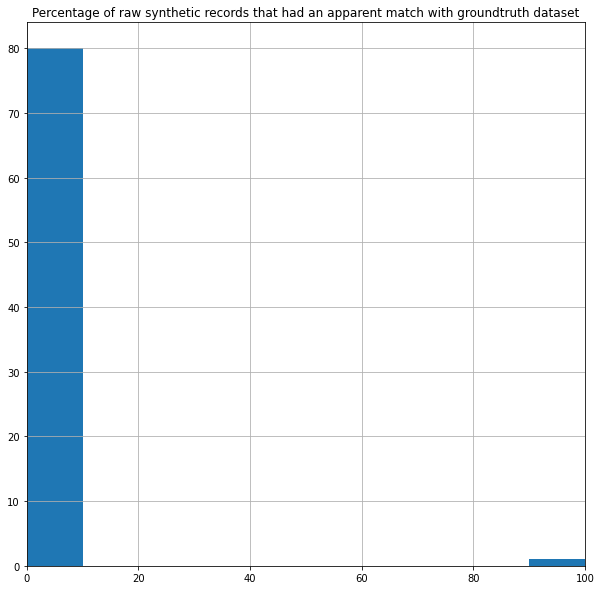

Privacy Metrics 2 Test n.1 Aggregated Results:  0.9876543209876543
Privacy Metrics 2 Test n.1 - Elapsed Time =  0.2935875470002429


In [ ]:
start_test_time = timeit.default_timer()
'''
# Load datasets 
dataset = pd.read_csv('/content/telephony_synth_data_generated_by_method_copulagantotal_time_2863.58_score_0.45_export.csv')  
#groundtruth = pd.read_csv(args.groundtruth, dtypye=dtypes)
groundtruth = pd.read_csv('/content/syntetic_telephony_export.csv')

dataset.drop("Unnamed: 0", axis=1, inplace=True)
groundtruth.drop("Unnamed: 0", axis=1, inplace=True)
'''

q = 'CELL_CALL_CODE'
Qs = q.split(",")
Qs = [s.strip(" ") for s in Qs]

x = 'CALL_DATE,TIME_MIN_CALL'
Xs = x.split(",")
Xs = [s.strip(" ") for s in Xs]
#percents, uniques1, uniques2, matched  = cellchange(groundtruth, dataset, Qs, Xs)
percents, uniques1, uniques2, matched  = cellchange(orig_data, synth_data, Qs, Xs)
    
if display_matches is True: 
  print("Matched: \n",matched)
  print("Percents: \n",percents)

#Histogram
plt.figure(figsize = (10,10))
plt.title('Percentage of raw synthetic records that had an apparent match with groundtruth dataset')
percents.hist()
plt.xlim(0,100)
plt.savefig('privacy_metric.png')
plt.show()

print("Privacy Metrics 2 Test n.1 Aggregated Results: ", aggr_privacy(percents))
print("Privacy Metrics 2 Test n.1 - Elapsed Time = ", timeit.default_timer() - start_test_time)

Aggregated Privacy is 1 - the normalized sum of all matches. More matches means less privacy, so 1 means high privacy, 0 means low privacy. In our first test **0.9876543209876543** means high privacy. 

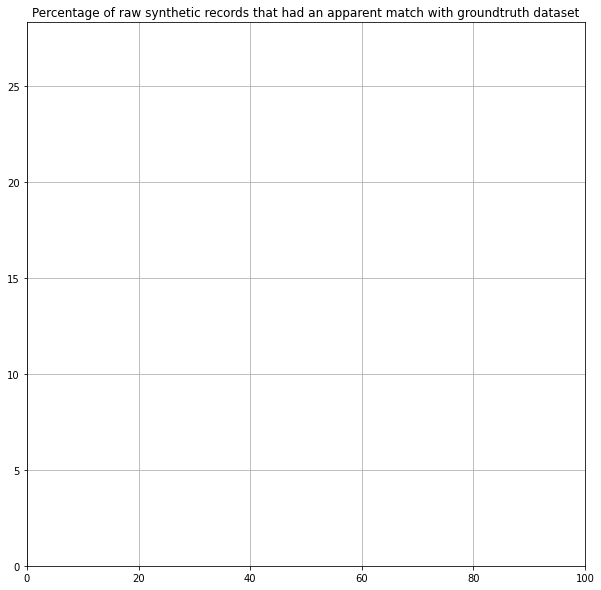

Privacy Metrics 2 Test n.2 Aggregated Results:  1.0
Privacy Metrics 2 Test n.2 - Elapsed Time =  0.27324818299985054


In [ ]:
start_test_time = timeit.default_timer()

q = 'NUM_CALLER_KEY'
Qs = q.split(",")
Qs = [s.strip(" ") for s in Qs]

x = 'CALL_DATE,TIME_MIN_CALL'
Xs = x.split(",")
Xs = [s.strip(" ") for s in Xs]
percents, uniques1, uniques2, matched  = cellchange(orig_data, synth_data, Qs, Xs)

if display_matches is True: 
  print("Matched: \n",matched)
  print("Percents: \n",percents)

#Histogram
plt.figure(figsize = (10,10))
plt.title('Percentage of raw synthetic records that had an apparent match with groundtruth dataset')
percents.hist()
plt.xlim(0,100)
plt.savefig('privacy_metric.png')
plt.show()
print("Privacy Metrics 2 Test n.2 Aggregated Results: ", aggr_privacy(percents))
print("Privacy Metrics 2 Test n.2 - Elapsed Time = ", timeit.default_timer() - start_test_time)

#**Model Visual Evaluation**

#**Original Data Univariate Distribution on NUM_CALLER_KEY**

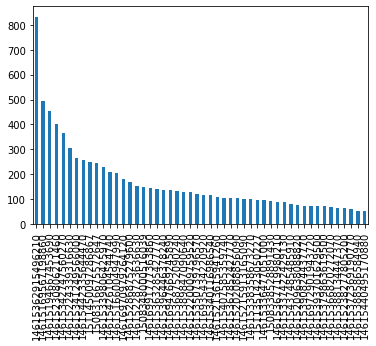

In [ ]:
orig_data.NUM_CALLER_KEY.value_counts()[0:50].plot.bar()

#**Synthetic Data Univariate Distribution on NUM_CALLER_KEY**

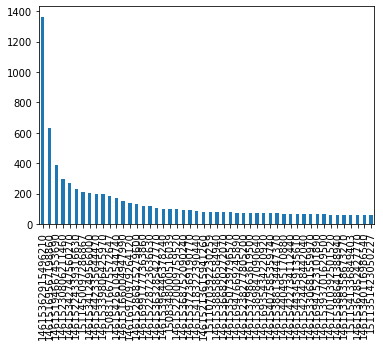

In [ ]:
#pd.DataFrame(synth_data.NUM_CALLER_KEY.value_counts()).hist(bins=20)
synth_data.NUM_CALLER_KEY.value_counts()[0:50].plot.bar()


plt.show()

#**Original Data Univariate Distribution on CELL_CALL_CODE**

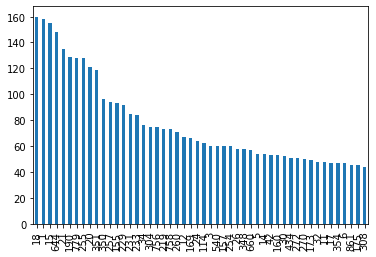

In [ ]:
#pd.DataFrame(orig_data.CELL_CALL_CODE.value_counts()).hist(bins=20)
orig_data.CELL_CALL_CODE.value_counts()[0:50].plot.bar()
plt.show()

#**Synthetic Data Univariate Distribution on CELL_CALL_CODE**

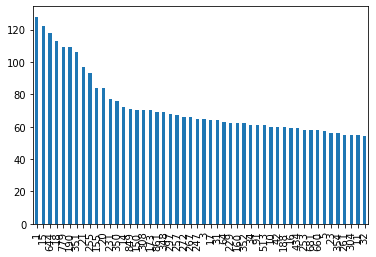

In [ ]:
#pd.DataFrame(synth_data.CELL_CALL_CODE.value_counts()).hist(bins=20)
synth_data.CELL_CALL_CODE.value_counts()[0:50].plot.bar()
plt.show()

#**Original Data Bivariate Distribution on NUM_CALLER_KEY and CELL_CALL_CODE**

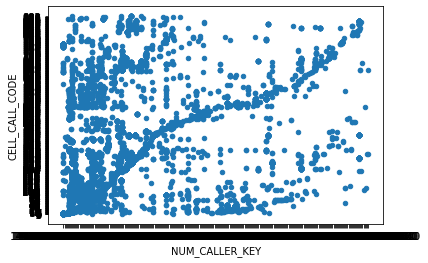

In [ ]:
orig_data.plot.scatter("NUM_CALLER_KEY", "CELL_CALL_CODE")
plt.show()

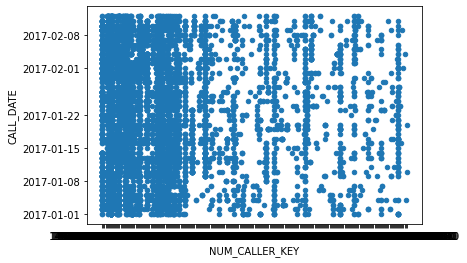

In [ ]:
orig_data.plot.scatter("NUM_CALLER_KEY", "CALL_DATE")
plt.show()

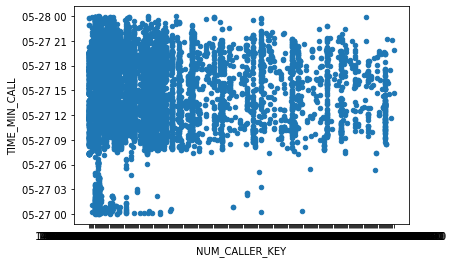

In [ ]:
orig_data.plot.scatter("NUM_CALLER_KEY", "TIME_MIN_CALL")
plt.show()

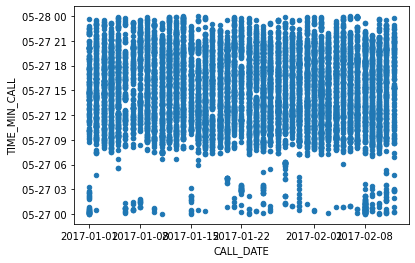

In [ ]:
orig_data.plot.scatter("CALL_DATE", "TIME_MIN_CALL")
plt.show()

#**Synthetic Data Bivariate Distribution on NUM_CALLER_KEY and CELL_CALL_CODE**

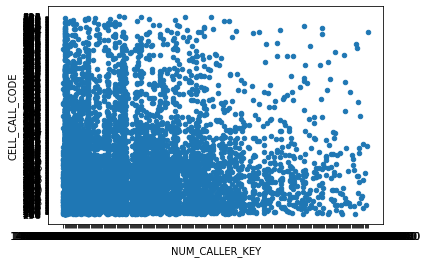

In [ ]:
synth_data.plot.scatter("NUM_CALLER_KEY", "CELL_CALL_CODE")
plt.show()

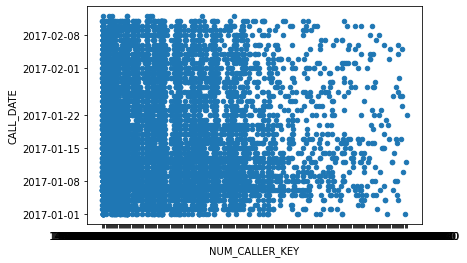

In [ ]:
synth_data.plot.scatter("NUM_CALLER_KEY", "CALL_DATE")
plt.show()

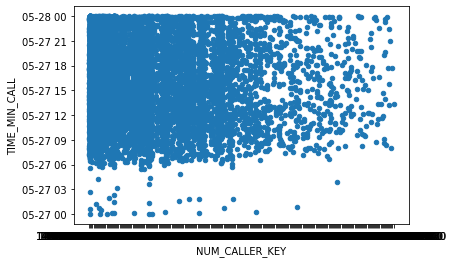

In [ ]:
synth_data.plot.scatter("NUM_CALLER_KEY", "TIME_MIN_CALL")
plt.show()

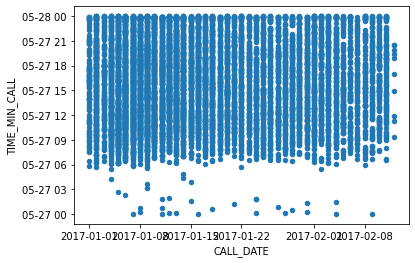

In [ ]:
synth_data.plot.scatter("CALL_DATE", "TIME_MIN_CALL")
plt.show()

#**Original and Synthetic Data Univariate Distribution Comparison on CALL_DATE**

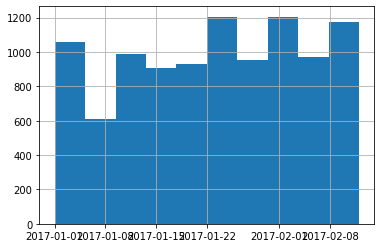

In [ ]:
orig_data.CALL_DATE.hist()
plt.show()

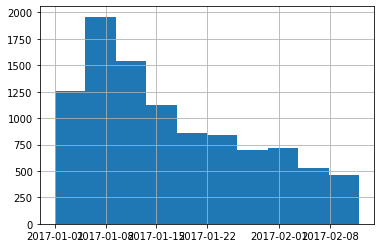

In [ ]:
synth_data.CALL_DATE.hist()
plt.show()

#**Original and Synthetic Data Univariate Distribution Comparison on TIME_MIN_CALL**

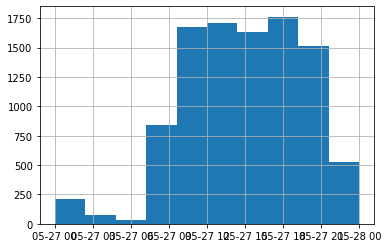

In [ ]:
orig_data.TIME_MIN_CALL.hist()
plt.show()

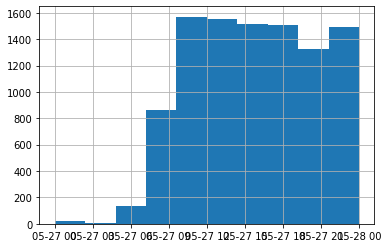

In [ ]:
synth_data.TIME_MIN_CALL.hist()
plt.show()

#**Disjoint Sets Test**

In [ ]:
A=set(orig_data.NUM_CALLER_KEY.astype("str"))
B=set(synth_data.NUM_CALLER_KEY.astype("str"))
print(B.difference(A))

set()


#**Random Forest Evaluation of Original Data**

In [ ]:
X = orig_data[["NUM_CALLER_KEY"]]
y = orig_data[["CELL_CALL_CODE"]]
#X.CALL_DATE = X.CALL_DATE.astype("int")
#X.TIME_MIN_CALL = X.TIME_MIN_CALL.astype("int")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape

(7000, 1)

In [ ]:
X_train

,NUM_CALLER_KEY
9069,14616947669245890
2603,14615415193963470
7738,14615438056365470
1579,1511265983244300
5058,1511450097286867
...,...
5734,14615169567198860
5191,1511070392230259
5390,14615362915496210
860,1511450097286867


In [ ]:
y_train

,CELL_CALL_CODE
9069,190
2603,11
7738,769
1579,255
5058,155
...,...
5734,255
5191,597
5390,233
860,157


In [ ]:
clf_true = RandomForestClassifier(n_estimators=100)
clf_true.fit(X_train, y_train)

y_pred=clf_true.predict(X_test)
print("Base Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Base classification report:",metrics.classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Base Accuracy: 0.25333333333333335
Base classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.39      1.00      0.56        55
          10       0.32      0.88      0.47        16
         100       0.00      0.00      0.00        11
         101       0.00      0.00      0.00        14
         102       0.00      0.00      0.00         4
         103       0.00      0.00      0.00        11
         104       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         2
         106       0.00      0.00      0.00         4
         107       0.00      0.00      0.00         6
         108       0.00      0.00      0.00         3
         109       0.00      0.00      0.00         2
          11       0.00      0.00      0.00        17
         110       0.00      0.00      0.00         1
         111       0.13      1.00      0.23         3
         113      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

#**Random Forest Evaluation of Synthetic Data**

In [ ]:
X = synth_data[["NUM_CALLER_KEY"]]
y = synth_data[["CELL_CALL_CODE"]]
#X.CALL_DATE = X.CALL_DATE.astype("int")
#X.TIME_MIN_CALL = X.TIME_MIN_CALL.astype("int")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape

(7000, 1)

In [ ]:
X_train

,NUM_CALLER_KEY
9069,14616970979264120
2603,14615224339316630
7738,14615366751767070
1579,14615424428442040
5058,14615418322390440
...,...
5734,14615389847090640
5191,14615407585359740
5390,14615388641388940
860,14615342747560270


In [ ]:
y_train

,CELL_CALL_CODE
9069,91
2603,14
7738,769
1579,852
5058,91
...,...
5734,70
5191,144
5390,101
860,203


In [ ]:
clf_true = RandomForestClassifier(n_estimators=100)
clf_true.fit(X_train, y_train)

y_pred=clf_true.predict(X_test)
print("Base Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Base classification report:",metrics.classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Base Accuracy: 0.008333333333333333
Base classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.03      0.01        33
          10       0.00      0.00      0.00        19
         100       0.00      0.00      0.00         8
         101       0.00      0.00      0.00        21
         102       0.00      0.00      0.00         5
         103       0.00      0.00      0.00        14
         104       0.00      0.00      0.00         1
         106       0.00      0.00      0.00         4
         107       0.00      0.00      0.00         6
         108       0.00      0.00      0.00         3
         109       0.00      0.00      0.00         5
          11       0.00      0.00      0.00        17
         110       0.00      0.00      0.00         1
         111       0.00      0.00      0.00         4
         113       0.00      0.00      0.00         2
         114     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

Random Forest Accuracy on the Original Data is **0.576** while Random Forest Accuracy on the Synthetic Data is **0.0526** so Original Data and Synthetic Data have the same characteristics, they are comparable. 

#**Overall Aggregated Score Metrics**

In [ ]:
start_test_time = timeit.default_timer()
tmp_orig_data = orig_data.copy()
tmp_synth_data = synth_data.copy()
tmp_orig_data.CELL_CALL_CODE = pd.to_numeric(tmp_orig_data.CELL_CALL_CODE)
tmp_orig_data.NUM_CALLER_KEY = pd.to_numeric(tmp_orig_data.NUM_CALLER_KEY)
tmp_synth_data.CELL_CALL_CODE = pd.to_numeric(tmp_synth_data.CELL_CALL_CODE)
tmp_synth_data.NUM_CALLER_KEY = pd.to_numeric(tmp_synth_data.NUM_CALLER_KEY)
results = evaluate(tmp_synth_data, tmp_orig_data)
print("Overall Aggregated Metrics Results: ", results)
print("Overall Aggregated Metrics - Elapsed Time = ", timeit.default_timer() - start_test_time)

Overall Aggregated Metrics Results:  0.9596909762062428
Overall Aggregated Metrics - Elapsed Time =  154.49360118200002


/usr/local/lib/python3.7/dist-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isna(real_data)] = 0.0
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
/usr/local/lib/python3.7/dist-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [ ]:
!pip install table_evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 285 kB 5.9 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [ ]:
start_test_time = timeit.default_timer()
from table_evaluator import TableEvaluator
tmp_orig_data = orig_data.copy()
tmp_synth_data = synth_data.copy()
tmp_orig_data.CELL_CALL_CODE = pd.to_numeric(tmp_orig_data.CELL_CALL_CODE)
tmp_orig_data.NUM_CALLER_KEY = pd.to_numeric(tmp_orig_data.NUM_CALLER_KEY)
tmp_synth_data.CELL_CALL_CODE = pd.to_numeric(tmp_synth_data.CELL_CALL_CODE)
tmp_synth_data.NUM_CALLER_KEY = pd.to_numeric(tmp_synth_data.NUM_CALLER_KEY)
table_evaluator = TableEvaluator(tmp_orig_data, tmp_synth_data)
table_evaluator.evaluate(target_col='NUM_CALLER_KEY')
table_evaluator.visual_evaluation()
print("Overall Aggregated Metrics Results: ", results)
print("Overall Aggregated Metrics - Elapsed Time = ", timeit.default_timer() - start_test_time)

ImportError: ignored